In [1]:
from PIL import Image

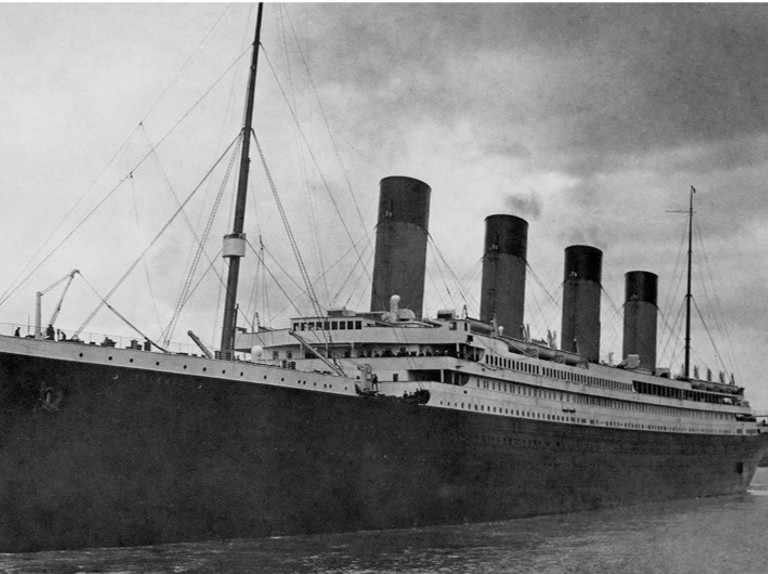

In [2]:
Image.open('image/titanic.jpg')

In [7]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv('data/train.csv')

In [9]:
# Lets check first 5 rows of our dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


TypeError: 'float' object is not subscriptable

In [6]:
# Lets check if we have any null values or not

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Lets check the shape of our training dataset

df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Now lets plot our data using Matplotlib and Seaborn packages and do the visulization.

In [10]:
import seaborn as sns

In [11]:
# Lets create a function which can draw bar chart for differnet columns like Pclass, Sex, Age, Sibsp, 

def create_bar(column_name):
    survived = df[df['Survived']==1][column_name].value_counts()
    dead = df[df['Survived']==0][column_name].value_counts()
    df1 = pd.DataFrame([survived,dead])
    df1.index = ['Survived','Dead']
    df1.plot(kind='bar',stacked=True, figsize=(10,5))

Survived female    233
male      109
Name: Sex, dtype: int64
Dead male      468
female     81
Name: Sex, dtype: int64


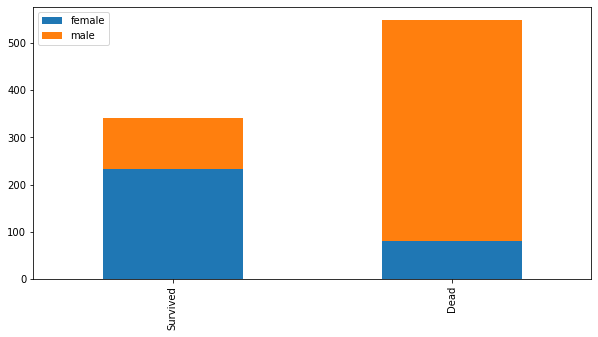

In [12]:
create_bar('Sex')
print('Survived', df[df['Survived']==1]['Sex'].value_counts())
print('Dead', df[df['Survived']==0]['Sex'].value_counts())


# In above bar chart, we can analyze that Number of female less died in comparasion of number of men.

Survived 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead 3    372
2     97
1     80
Name: Pclass, dtype: int64


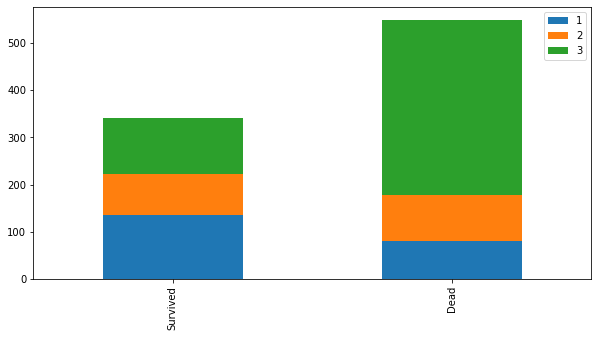

In [13]:
create_bar('Pclass')
print('Survived', df[df['Survived']==1]['Pclass'].value_counts())
print('Dead', df[df['Survived']==0]['Pclass'].value_counts())

# In above bar chart, we can confirm that 1st class more likely survived than other classes and 3rd class are more dead in comparsion to other class.

Survived 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


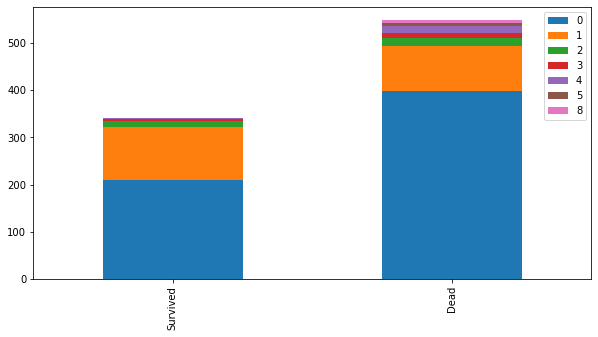

In [14]:
create_bar('SibSp')
print('Survived', df[df['Survived']==1]['SibSp'].value_counts())
print('Dead', df[df['Survived']==0]['SibSp'].value_counts())

# The above chart confirms that person aboarded with more than 2 siblings or spouse more likely survived and a person aboarded without siblings or spouse more likely dead

Survived 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


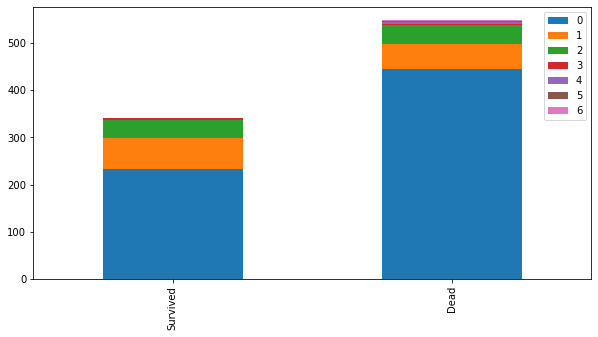

In [15]:
create_bar('Parch')
print('Survived', df[df['Survived']==1]['Parch'].value_counts())
print('Dead', df[df['Survived']==0]['Parch'].value_counts())

# The above chart confirms that person aboarded with more than 2 parents or children more likely survived and person aboarded alone more likely dead

Survived S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead S    427
C     75
Q     47
Name: Embarked, dtype: int64


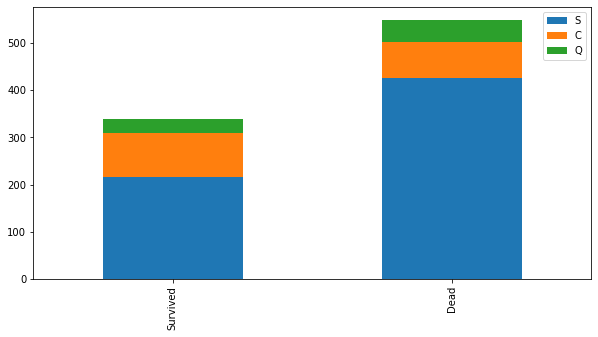

In [16]:
create_bar('Embarked')
print('Survived', df[df['Survived']==1]['Embarked'].value_counts())
print('Dead', df[df['Survived']==0]['Embarked'].value_counts())

# The above chart confirms that person aboarded from C slightly more likely survived and person aboarded from Q and S more likely dead.

In [17]:
# Lets do some feature engineering

In [18]:
# First lets delete those coloumns or features that we don't need.

In [19]:
df.drop('Name', axis =1, inplace = True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# We use get_dummies to convert a Sex column to numerical value.

df1=pd.get_dummies(df,columns=['Sex'], drop_first=True)

In [22]:
# Lets rename the column Sex_male to just Sex


In [23]:
df1.rename(columns = {'Sex_male':'Sex'}, inplace = True) 

In [24]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1


In [25]:
#Checking the unique category names in embarked column

df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex              0
dtype: int64

In [27]:
# As we can see that there are 177 null values in age and around 687 null values in cabin and 2 null values in embarked.


In [28]:
#Lets see records that are have null values in Embarked column


df1[df1['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
61,62,1,1,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,62.0,0,0,113572,80.0,B28,NaN,0


In [29]:
#Lets see records that are have null values in Embarked column
df1[df1['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,NaN,0,0,330877,8.4583,NaN,Q,1
7,8,0,3,2.0,3,1,349909,21.0750,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1
885,886,0,3,39.0,0,5,382652,29.1250,NaN,Q,0
886,887,0,2,27.0,0,0,211536,13.0000,NaN,S,1
888,889,0,3,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [30]:
# Lets replace the missing values in age with median as its robust to outliers.

df1.Age.fillna(df1.groupby(['Sex','Pclass']).transform('median').Age, inplace=True)

In [31]:
df1.head(50)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,25.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,14.0,1,0,237736,30.0708,NaN,C,0


In [32]:

df1.head(50)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,25.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,14.0,1,0,237736,30.0708,NaN,C,0


In [33]:
df1.head(50)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,25.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,14.0,1,0,237736,30.0708,NaN,C,0


In [34]:
# Lets again check the missing values in age_median

df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex              0
dtype: int64

In [35]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1


In [36]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1


In [37]:
# Lets again check the null values

df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex              0
dtype: int64

In [38]:
# Lets check the unique categories in feature Cabin

df1['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
# Lets check the value count of these categories

df1.Cabin.value_counts().unique()

array([4, 3, 2, 1], dtype=int64)

In [40]:
# Lets drop the coloumns or features that we don't need in training the modelabs

df1.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [41]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [42]:
# Lets check the unique categories in feature Embarked

df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
# Lets check the null values

df1.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Sex         0
dtype: int64

In [44]:
# Lets check those 2 records that have nan values in Embarked and lets drop them as they are only 2.

df1[df1['Embarked'].isnull()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
61,1,1,38.0,0,0,80.0,NaN,0
829,1,1,62.0,0,0,80.0,NaN,0


In [45]:
df1.drop(index=[61,829], inplace = True)

In [46]:
# Lets check if null values records are dropped or not.

df1.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Sex         0
dtype: int64

In [47]:
# Let see the first 5 records again.

df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [48]:
#Now lets check which features need to be transformed / formatted 

#pclass : its just an integer value with a hierarchy,so no changes required.
#Age : We can make it categorical using buckets like child <=12 , Teenager : 13 to 20, adult : 21-25, Middle aged : 35-50, old>50
#Fare : We can create buckets for this as well
# Sibsp and parch : These indicate how many people from family (Sibling, Spouse, Parents and Children) are 
#travelling along with the passenger, we create a new continuous variable as family size 
#( 1 for teh passenger plus any additional travellers coming from family). From family size, we create buckets to indicate as whether the traveller is alone (1), small family (2-4) or has a big family (>4).

In [49]:
# Convert the Embarked classes to integer form

df1["Port"] = 0
df1.loc[df1['Embarked']=='S','Port']=0
df1.loc[df1['Embarked']=='C','Port']=1
df1.loc[df1['Embarked']=='Q','Port']=2


In [51]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,Port
0,0,3,22.0,1,0,7.2500,S,1,0
1,1,1,38.0,1,0,71.2833,C,0,1
2,1,3,26.0,0,0,7.9250,S,0,0
3,1,1,35.0,1,0,53.1000,S,0,0
4,0,3,35.0,0,0,8.0500,S,1,0


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Sex       889 non-null    uint8  
 8   Port      889 non-null    int64  
dtypes: float64(2), int64(5), object(1), uint8(1)
memory usage: 63.4+ KB


In [53]:
# Create buckets for Age
df1["Age_cat"] = 0
df1.loc[(df1['Age']>0)&(df1['Age']<13),'Age_cat']=0
df1.loc[(df1['Age']>12)&(df1['Age']<=20),'Age_cat']=1
df1.loc[(df1['Age']>20)&(df1['Age']<=35),'Age_cat']=2
df1.loc[(df1['Age']>35)&(df1['Age']<=50),'Age_cat']=3
df1.loc[df1['Age']>50,'Age_cat']=4

In [54]:
# Create buckets for Fare
df1["Fare_cat"] = 0
df1.loc[df1['Fare']<=8,'Fare_cat']=0
df1.loc[(df1['Fare']>8)&(df1['Fare']<=15),'Fare_cat']=1
df1.loc[(df1['Fare']>15)&(df1['Fare']<=31),'Fare_cat']=2
df1.loc[df1['Fare']>31,'Fare_cat']=3

In [55]:
# Create a new variable family size and buckets for the same as travel_company
df1["family_size"] = df1["SibSp"] + df1["Parch"] + 1
df1["travel_company"] = 0
df1.loc[df1['family_size']<=1,'travel_company']=0
df1.loc[(df1['family_size']>1)&(df1['family_size']<=4),'travel_company']=1
df1.loc[df1['family_size']>4,'travel_company']=2

In [56]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,Port,Age_cat,Fare_cat,family_size,travel_company
0,0,3,22.0,1,0,7.2500,S,1,0,2,0,2,1
1,1,1,38.0,1,0,71.2833,C,0,1,3,3,2,1
2,1,3,26.0,0,0,7.9250,S,0,0,2,0,1,0
3,1,1,35.0,1,0,53.1000,S,0,0,2,3,2,1
4,0,3,35.0,0,0,8.0500,S,1,0,2,1,1,0


In [57]:
# Remove the unneccessary vaiables and make sure the new variables got added

df1.drop(['Age','SibSp','Parch','Fare','Embarked','family_size'],axis=1,inplace=True)

In [58]:
df1.head()

,Survived,Pclass,Sex,Port,Age_cat,Fare_cat,travel_company
0,0,3,1,0,2,0,1
1,1,1,0,1,3,3,1
2,1,3,0,0,2,0,0
3,1,1,0,0,2,3,1
4,0,3,1,0,2,1,0


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        889 non-null    int64
 1   Pclass          889 non-null    int64
 2   Sex             889 non-null    uint8
 3   Port            889 non-null    int64
 4   Age_cat         889 non-null    int64
 5   Fare_cat        889 non-null    int64
 6   travel_company  889 non-null    int64
dtypes: int64(6), uint8(1)
memory usage: 49.5 KB


In [60]:
df1['Sex'] = df1['Sex'].astype(np.int64)

In [61]:
df1.isnull().sum()

Survived          0
Pclass            0
Sex               0
Port              0
Age_cat           0
Fare_cat          0
travel_company    0
dtype: int64

Text(0.5, 1.0, 'Correlation Heat map for candidate variables')

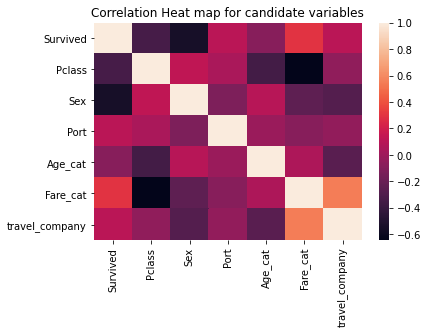

In [62]:
# Check the correlation among the rest of the available variables
sns.heatmap(df1.corr()).set_title('Correlation Heat map for candidate variables')

There is slightly positive correlation between Fare category and travel company 
which could mean if you are travelling alone, you could adjust in cabins 
with lower fares but when you travel with family/partner, you would prefer 
better stay arrangements. There is also a strong negative correlation between
Passenger class and Fare category because higher the class (1 being highest here),
the more fare you pay. We can still keep these in the preliminary model and see if removing Fare 
gives a better model later.

In [70]:
# Lets apply logistic regression and Decision Tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [64]:
X = df1[["Pclass", "Sex", "Port", "Age_cat", "travel_company"]].values
y = df1["Survived"].values

In [65]:
# Splitting the dataset into test and training with 80% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [66]:
# Building the Logistic Regression model using the training dataset
Lr = LogisticRegression()
Lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Testing the model with the test dataset (do not confuse with the actual Test dataset)
y_pred = Lr.predict(X_test)
print('The model accuracy is',accuracy_score(y_pred, y_test))
print('The R-square value is', r2_score(y_pred, y_test)) 
#Although R-square doesn't provide a lot of info in binary models

The model accuracy is 0.7696629213483146
The R-square value is 0.018690332123168063


In [68]:
# Building the Decision tree model using the training dataset
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)


DecisionTreeClassifier()

In [69]:
# Testing the model with the test dataset (do not confuse with the actual Test dataset)
y_pred = DecTree.predict(X_test)
print('The model accuracy is', accuracy_score(y_pred, y_test))
print('The R-square value is', r2_score(y_pred, y_test))
#Although R-square doesn't provide a lot of info in binary models

The model accuracy is 0.7808988764044944
The R-square value is -0.006524575902566054


In [89]:
# Building the Random forest model using the training dataset

Rf = RandomForestClassifier(max_depth = 8, min_samples_split=2, n_estimators = 100, random_state = 1)
Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=1)

In [90]:
y_pred = Rf.predict(X_test)
print('The model accuracy is', accuracy_score(y_pred, y_test))
print('The R-square value is', r2_score(y_pred, y_test))

The model accuracy is 0.7808988764044944
The R-square value is 0.02732240437158462


Conclusion from the Titanic Survival Analysis :-

Findings from EDA - If you were on "the Titanic", your chances to survive would be the highest if you are a young female (or a child), have enough money to buy high fared tickets to get into a 1st class cabin, travelling in small family and getting aboard at the Port of Cherbourg.


Model development - Out of the 3 models tried out, Randon Forest and Decision tree gives us the best accuracy.